<a href="https://colab.research.google.com/github/karan51ngh/machineLearning/blob/main/supportVectorModel/supportVectorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#visualization library
from google.colab import drive

##2.Loading Data

In [39]:
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [40]:
df=pd.read_csv('/content/mydrive/MyDrive/ColabNotebooks/MLLearningData/insurance.csv')

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
#based on the above parameters, the company will decide the charges for a person.

##3.Data Cleaning

In [43]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##4.Feature Engineering

In [46]:
Male = pd.get_dummies(df['sex'], drop_first = True)#get dummies is used to one hot encode categorical data, drop_first will drop one column(coz we have only 2 categories in 'sex')
df = pd.concat([df, Male], axis =1)#adding a new column

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [48]:
Smoker = pd.get_dummies(df['smoker'])
df = pd.concat([df, Smoker], axis =1)

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0


In [50]:
df=df.drop(['no'],axis=1)#dropping manually

In [51]:
#renaming 'yes' to 'smoker'
df=df.rename(columns={'yes':'Smoker'})#will drop 'sex' and 'smoker' later

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [53]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [54]:
region = pd.get_dummies(df['region'])#storing all region categories in region
df = pd.concat([df, region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


##5.Exploratory Analysis

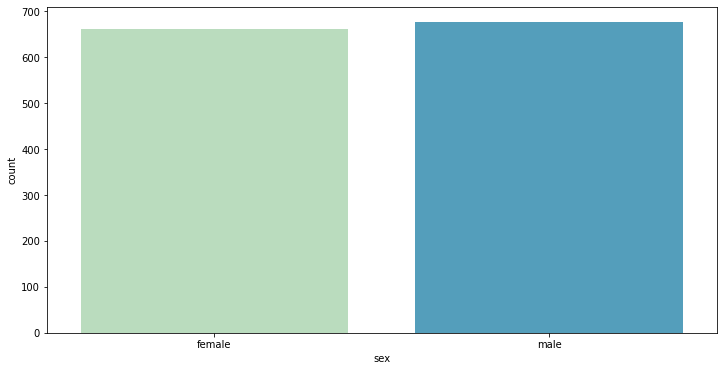

In [55]:
plt.figure(figsize = (12,6))
# sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')#will count total count for female, and male and give the visual representation
# sns.despine(left = True)

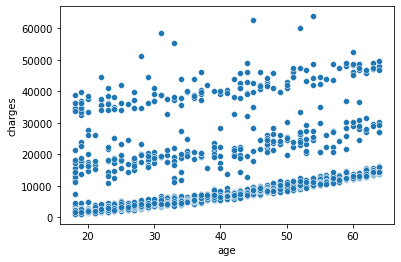

In [56]:
sns.scatterplot(x = 'age', y = 'charges', data =df) #so we see that with age charges are increasing

In [91]:
# plt.figure(figsize = (12,6))
# sns.set_style('white')
# sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'smoker')
# sns.despine(left = True)

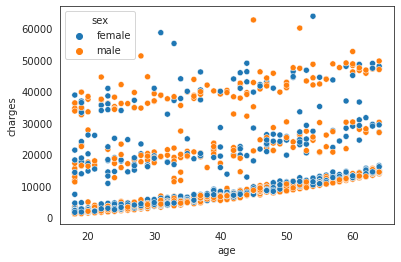

In [58]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')#hue helps us add 1 more dimension
#no relevance of gender therfore

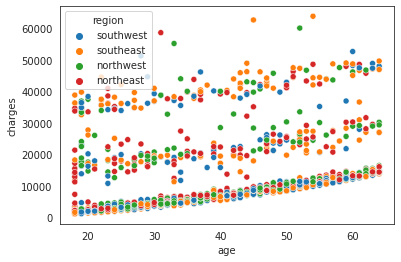

In [59]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')#no relevance of region therfore

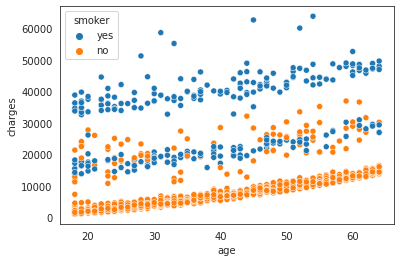

In [60]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'smoker')#relevance of smoker is pretty high

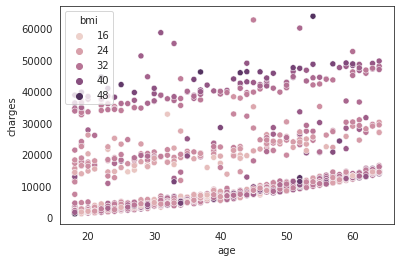

In [61]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'bmi')#relevance of bmi is high

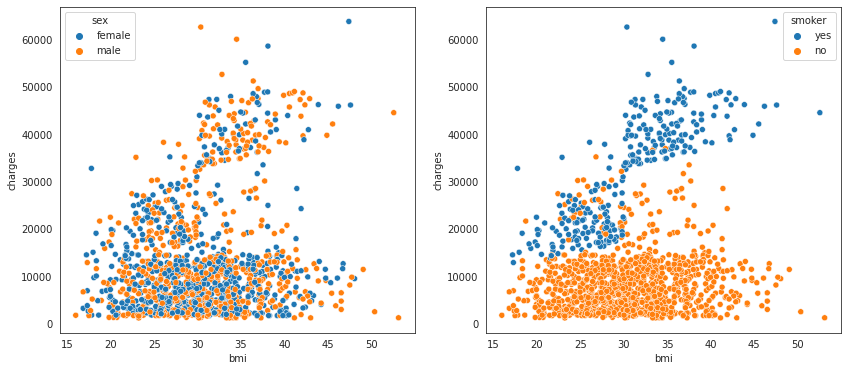

In [62]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))#for 2 graphs together, defining #of rows, #of columns, and define ax for each graph
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'smoker', ax = ax[1])#smoking + high bmi implies high charges 

In [63]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [64]:
df.corr()#correlation matrix #range of a corr mtx lies bw -1 to 1. where -1: negatively co-related, +1: possitively co-related, 0: no corelation

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


In [65]:
df.drop(['sex', 'region','smoker', 'southwest'], axis=1, inplace=True)#dropping categorical stuff

In [66]:
df.head()

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


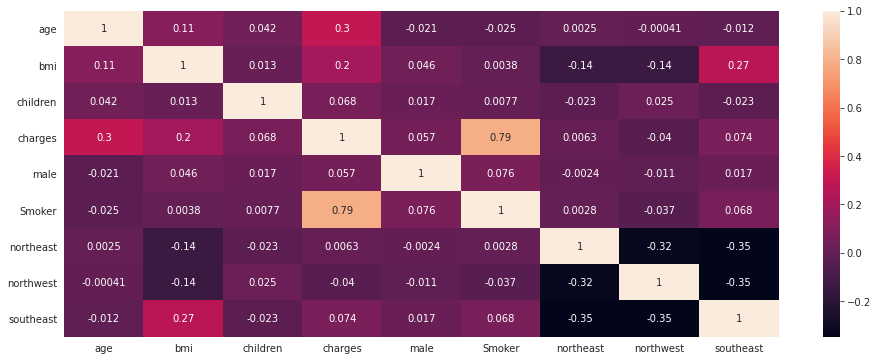

In [67]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

##6.Splitting the Data

In [68]:
df.head()

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [69]:
x = df.drop(['charges','male','northeast','northwest','southeast','children'], axis = 1)
y = df['charges']

In [70]:
x

,age,bmi,Smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [71]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [90]:
y_test.shape

(536,)

In [81]:
x_train.shape

(802, 3)

In [74]:
df.head()

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
#fit will learn the statistical values of parameters  -mean(), std()  
#transform() will (age(i)-mean(age)/std(age))

In [82]:
scaled_x_train

array([[ 1.56595065,  1.37262151, -0.51476619],
       [ 0.00495442, -0.71714411, -0.51476619],
       [ 1.28213316,  0.19226088, -0.51476619],
       ...,
       [ 0.28877192, -0.6092486 ,  1.94262954],
       [ 0.99831566,  0.42346554, -0.51476619],
       [ 0.64354379, -0.43969852, -0.51476619]])

##7.Support Vector Regression

In [83]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')#can pass 'sigmoid' too
regressor.fit(scaled_x_train, y_train)

predictions = regressor.predict(scaled_x_test)

In [84]:
predictions

array([9382.13386357, 9152.82332754, 9254.91982166, 9394.34722211,
       9414.02715078, 9178.65661428, 9384.66523398, 9378.51883204,
       9376.91101973, 9384.37092846, 9395.51416058, 9163.56368416,
       9215.46022509, 9189.76135228, 9374.97821789, 9366.2087498 ,
       9315.63464251, 9229.01325313, 9203.25665823, 9202.94017394,
       9157.20302869, 9409.31380098, 9203.22283879, 9360.65645602,
       9376.16359368, 9308.71829085, 9167.35891144, 9367.16342694,
       9388.97306266, 9338.22185657, 9367.90617485, 9200.5642185 ,
       9385.54886295, 9154.055141  , 9288.18736453, 9221.53134561,
       9394.06564278, 9341.81974312, 9181.9001425 , 9394.41691415,
       9334.48143759, 9389.15433929, 9159.72546679, 9212.16520015,
       9338.2388445 , 9391.24606125, 9326.44239123, 9286.91638674,
       9179.08146152, 9322.59938047, 9307.99545848, 9387.35173202,
       9327.92410812, 9257.83993969, 9348.11010457, 9402.11946452,
       9220.79305378, 9398.21056814, 9233.10692876, 9250.30271

In [86]:
y_test

25      14001.13380
1214     3956.07145
1149     5979.73100
435     13919.82290
254     41097.16175
           ...     
524     38245.59327
1330    12629.16560
42       6272.47720
754     17128.42608
1057    17929.30337
Name: charges, Length: 536, dtype: float64

In [88]:
np.mean((y_test - predictions)**2)

145391867.38194308

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Predict')

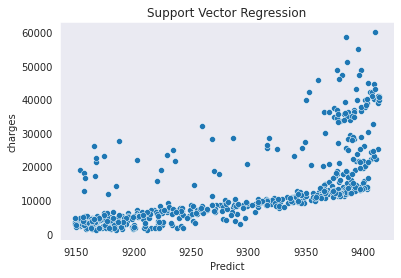

In [80]:
sns.set_style('dark')
f = sns.scatterplot(predictions,y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')